In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
price = pd.read_excel('./장아찌가격정보.xlsx')

In [3]:
price[:5]

,판매처,구분,제품명,중량(g),판매가격(원),100g당 가격(원)
0,배가원,톳,톳 장아찌,500,7600,1520.0
1,배가원,마늘,통마늘장아찌,500,7600,1520.0
2,배가원,고춧잎,고춧잎장아찌,500,7600,1520.0
3,배가원,깻잎,깻잎장아찌,500,6650,1330.0
4,배가원,다시마,다시마장아찌,500,6650,1330.0


In [4]:
price = price.rename(columns = {'중량(g)' : '중량'})

In [39]:
price['중량'].value_counts()

500     38
1000    31
150      7
120      6
400      3
300      3
100      3
3700     2
700      1
250      1
600      1
450      1
Name: 중량, dtype: int64

## 전체평균

In [6]:
int(price['100g당 가격(원)'].mean())

2048

## 500g 이상 가격

In [40]:
morethan_500 = price.query('(중량 >= 500) & (중량 != 3700)')
morethan_500 = morethan_500.rename(columns = {'100g당 가격(원)' : '100g 가격'})
morethan_500

,판매처,구분,제품명,중량,판매가격(원),100g 가격
0,배가원,톳,톳 장아찌,500,7600,1520.000000
1,배가원,마늘,통마늘장아찌,500,7600,1520.000000
2,배가원,고춧잎,고춧잎장아찌,500,7600,1520.000000
3,배가원,깻잎,깻잎장아찌,500,6650,1330.000000
4,배가원,다시마,다시마장아찌,500,6650,1330.000000
...,...,...,...,...,...,...
89,행복한엄마밥상,깻잎,깻잎장아찌,1000,14000,1400.000000
90,행복한엄마밥상,모듬,모듬장아찌,1000,14000,1400.000000
91,행복한엄마밥상,풋고추,풋고추장아찌,500,7500,1500.000000
92,행복한엄마밥상,풋고추,풋고추장아찌,1000,14000,1400.000000


In [45]:
int(np.round(morethan_500['100g 가격'].mean()))

1538

## 500g미만 가격

In [42]:
lessthan_500 = price.query('중량 < 500')
lessthan_500 = lessthan_500.rename(columns = {'100g당 가격(원)' : '100g 가격'})
lessthan_500

,판매처,구분,제품명,중량,판매가격(원),100g 가격
18,돌산갓아줌마,깻잎,된장깻잎장아찌,400,10000,2500.000000
20,돌산갓아줌마,콩잎,된장콩잎장아찌,400,10000,2500.000000
26,돌산갓아줌마,매실,매실장아찌,300,7000,2333.333333
30,마켓컬리(순창성가정식품),고들빼기,고들빼기장아찌,120,4500,3750.000000
31,마켓컬리(순창성가정식품),매실,매실장아찌,120,6000,5000.000000
32,마켓컬리(순창성가정식품),명이나물,명이나물절임,120,6500,5416.666667
33,마켓컬리(순창성가정식품),마늘쫑,마늘쫑장아찌,120,3900,3250.000000
34,마켓컬리(순창성가정식품),깻잎,양념깻잎장아찌,120,3900,3250.000000
35,마켓컬리(순창성가정식품),울외,울외장아찌,120,4200,3500.000000
36,마켓컬리(진가네반찬),고추,아삭이고추장아찌,100,3900,3900.000000


In [46]:
int(np.round(lessthan_500['100g 가격'].mean()))

3692

# ##########################################

print(max(price['판매가격(원)']))
print(min(price['판매가격(원)']))

for i in range(len(price)):
    if price['판매가격(원)'][i] == max(price['판매가격(원)']):
        print('최대 판매가', '\n\n', price.loc[i, :], '\n')

for i in range(len(price)):
    if price['판매가격(원)'][i] == min(price['판매가격(원)']):
        print('최소 판매가', '\n\n', price.loc[i, :])

for i in range(len(price)):
    if price['100g당 가격(원)'][i] == max(price['100g당 가격(원)']):
        print('최대 판매가', '\n\n', price.loc[i, :], '\n')

for i in range(len(price)):
    if price['100g당 가격(원)'][i] == min(price['100g당 가격(원)']):
        print('최소 판매가', '\n\n', price.loc[i, :])

In [4]:
grouped = price['100g당 가격(원)'].groupby(price['구분'])

In [5]:
# 원물별로 100g당 평균가격이 높은 순위.
wonmul_mean = grouped.mean().sort_values(ascending = False)
wonmul_mean.index[0:10]
wonmul_mean

구분
오가피순      4600.000000
곤드레       4600.000000
곰취나물      4600.000000
고들빼기      3750.000000
더덕        3550.000000
매실        3267.777778
명이나물      2963.333333
고사리       2954.166667
초석잠       2900.000000
냉이        2850.000000
뽕잎        2850.000000
곰취        2850.000000
구기자잎      2470.000000
콩잎        2446.000000
마늘쫑       2290.000000
울외        2250.000000
청양고추      2150.000000
삼채        1985.000000
깻잎        1972.222222
고추        1747.272727
머위        1660.000000
취나물       1540.000000
풋마늘대      1540.000000
방풍초       1540.000000
고춧잎       1520.000000
톳         1520.000000
모듬        1493.333333
마늘        1456.666667
풋고추       1450.000000
무말랭이      1330.000000
다시마       1330.000000
무         1315.608108
궁채        1057.500000
산상추       1000.000000
양파, 고추    1000.000000
양파         700.000000
오이         550.000000
우엉         513.513514
Name: 100g당 가격(원), dtype: float64

In [10]:
np.round(int(np.mean(wonmul_mean)))

2146

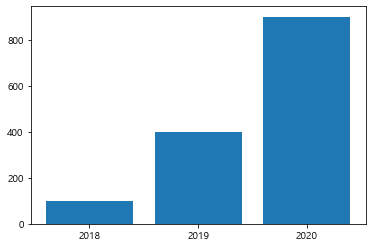

In [5]:
x = np.arange(3)
years = ['2018', '2019', '2020']
values = [100, 400, 900]

plt.bar(x, values)
plt.xticks(x, years)

plt.show()


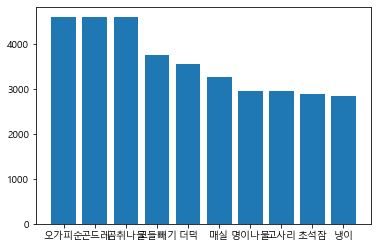

In [6]:
x = wonmul_mean.index[:10]
y = wonmul_mean.values[:10]

plt.bar(x, y)

plt.show()

## Plotly

In [49]:
import plotly.express as px
import cufflinks as cf
cf.go_offline(connected=True)

pd.set_option('display.precision', 2)

In [17]:
themes = cf.getThemes()
themes

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [68]:
wonmul_10 = wonmul_mean[:10]
wonmul_10.astype(int)
wonmul_10

구분
오가피순    4600.00
곤드레     4600.00
곰취나물    4600.00
고들빼기    3750.00
더덕      3550.00
매실      3267.78
명이나물    2963.33
고사리     2954.17
초석잠     2900.00
냉이      2850.00
Name: 100g당 가격(원), dtype: float64

df_wonmul_10 = pd.DataFrame(wonmul_10, index = wonmul_10.index, columns = ['가격'])
df_wonmul_10['가격'] = wonmul_10.values
df_wonmul_10.가격 = df_wonmul_10.가격.astype(int)
df_wonmul_10

In [75]:
wonmul_10 = np.around(wonmul_10)
wonmul_10

구분
오가피순    4600.0
곤드레     4600.0
곰취나물    4600.0
고들빼기    3750.0
더덕      3550.0
매실      3268.0
명이나물    2963.0
고사리     2954.0
초석잠     2900.0
냉이      2850.0
Name: 100g당 가격(원), dtype: float64

In [118]:
 wonmul_10.iplot(kind='bar', theme='polar', title= '원물 100g 가격 상위 Top 10',
                xTitle = '원물', yTitle = '가격')

In [98]:
title = '원물 100g 가격 상위 Top 10'

fig2 = px.bar(wonmul_10, text = wonmul_10.values, title = title)
fig2.update_layout(showlegend=False)
fig2.show()

In [90]:
# 구매가 많았던(리뷰수 상위) 사이트들에서의 판매 품목들
wonmul_size = grouped.size().sort_values(ascending = False)
wonmul_size_10 = wonmul_size[:10]
wonmul_size_10

구분
고추      11
깻잎       9
마늘       6
명이나물     5
콩잎       5
궁채       4
고사리      4
무        4
청양고추     4
매실       3
Name: 100g당 가격(원), dtype: int64

In [117]:
 wonmul_size_10.iplot(kind='bar', theme='polar', title= '리뷰수상위 사이트들의 판매 품목 Top 10', xTitle = '원물')

In [96]:
title = '리뷰수상위 사이트들의 판매 품목 Top 10'

fig3 = px.bar(wonmul_size_10, text = wonmul_size_10.values, title = title)
fig3.update_layout(showlegend=False)
fig3.show()

### 가격 라인그래프

In [113]:
price

,판매처,구분,제품명,중량(g),판매가격(원),100g당 가격(원)
0,배가원,톳,톳 장아찌,500,7600,1520.00
1,배가원,마늘,통마늘장아찌,500,7600,1520.00
2,배가원,고춧잎,고춧잎장아찌,500,7600,1520.00
3,배가원,깻잎,깻잎장아찌,500,6650,1330.00
4,배가원,다시마,다시마장아찌,500,6650,1330.00
...,...,...,...,...,...,...
92,행복한엄마밥상,풋고추,풋고추장아찌,1000,14000,1400.00
93,GREENDIARY,고사리,건고사리장아찌,600,14900,2483.33
94,지리산담은농장,고사리,건고사리장아찌,300,9000,3000.00
95,지리산담은농장,고사리,생고사리장아찌,300,9000,3000.00


In [116]:
price['100g당 가격(원)'].iplot(kind = 'line', theme = 'polar', title = '100g당 가격(원)')

In [115]:
price['판매가격(원)'].iplot(kind = 'line', theme = 'polar', title = '판매가격(원)')

In [100]:
px.line(price['판매가격(원)'])

<AxesSubplot:xlabel='구분'>

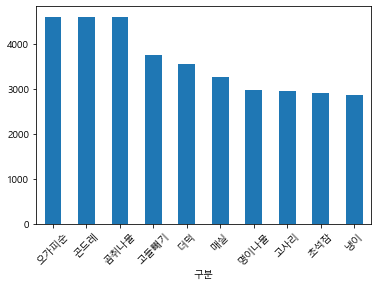

In [46]:
wonmul_mean[:10].plot(kind = 'bar', rot = 45)

In [48]:
# 구매가 많았던(리뷰수 상위) 사이트들에서의 판매 품목들
wonmul_size = grouped.size().sort_values(ascending = False)

<AxesSubplot:xlabel='구분'>

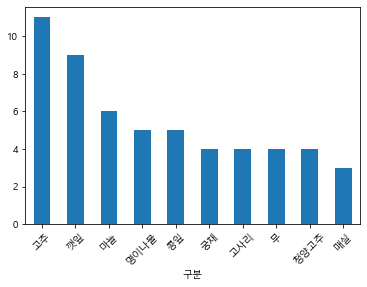

In [49]:
wonmul_size[:10].plot(kind = 'bar', rot = 45)

In [17]:
price['판매처'].unique()

array(['배가원', '돌산갓아줌마', '마켓컬리(순창성가정식품)', '마켓컬리(진가네반찬)', '마켓컬리(씨뜰리에)',
       '딸부자김치찌개', '남일푸드', '찬반찬', '단양구경시장유리네', '행복한엄마밥상', 'GREENDIARY',
       '지리산담은농장', '오밀스토어'], dtype=object)

In [ ]:
data_a = np.random.normal(0, 2.0, 1000)
data_b = np.random.normal(-3.0, 1.5, 500)
fig, ax = plt.subplots()

ax.boxplot([data_a, data_b, data_c])
ax.set_ylim(-10.0, 10.0)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')